In [60]:
import pandas as pd

In [61]:
mvps = pd.read_csv("mvps.csv")

In [62]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]

In [63]:
players = pd.read_csv("players.csv")

In [64]:
del players["Rk"]
del players["Unnamed: 0"]

In [65]:
players

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Year
0,Michael Jordan,27,CHI,SG,82,82,37.0,12.1,22.4,.539,...,4.6,6.0,5.5,2.7,1.0,2.5,2.8,31.5,"MVP-1,DPOY-7,AS,NBA1",1991
1,Karl Malone,27,UTA,PF,82,82,40.3,10.3,19.6,.527,...,8.9,11.8,3.3,1.1,1.0,3.0,3.3,29.0,"MVP-5,AS,NBA1",1991
2,Bernard King,34,WSB,SF,64,64,37.5,11.1,23.6,.472,...,3.2,5.0,4.6,0.9,0.3,4.0,2.9,28.4,"MVP-16,AS,NBA3",1991
3,Charles Barkley,27,PHI,SF,67,67,37.3,9.9,17.4,.570,...,6.3,10.1,4.2,1.6,0.5,3.1,2.6,27.6,"MVP-4,AS,NBA1",1991
4,Patrick Ewing,28,NYK,C,81,81,38.3,10.4,20.3,.514,...,8.8,11.2,3.0,1.0,3.2,3.6,3.5,26.6,"MVP-11,DPOY-7,AS,NBA2",1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20564,Ron Harper Jr.,23,TOR,PF,1,0,4.0,0.0,0.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,NaN,2024
20565,Justin Jackson,28,MIN,SF,2,0,0.5,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2024
20566,Dmytro Skapintsev,25,NYK,C,2,0,1.0,0.0,0.5,.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2024
20567,Javonte Smart,24,PHI,PG,1,0,1.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2024


In [66]:
players["Player"] = players["Player"].str.replace("*", "", regex=False)

In [67]:
def single_row(df):
    if df.shape[0] == 1:
        return df
    row = df[df["Team"].str.contains(r"^\dTM$", regex=True)]
    row["Team"] = df.iloc[-1]["Team"]
    return row

In [68]:
players = players.groupby(["Player", "Year"]).apply(single_row)

In [69]:
players.index = players.index.droplevel()
players.index = players.index.droplevel()

In [70]:
combined = players.merge(mvps, how="outer", on=["Player", "Year"])

In [71]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [72]:
combined = combined.dropna(subset=["Age"])

In [73]:
combined

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Awards,Year,Pts Won,Pts Max,Share
0,A.C. Green,27,LAL,PF,82,21,26.4,3.1,6.6,.476,...,0.7,0.3,1.2,1.4,9.1,NaN,1991,0.0,0.0,0.0
1,A.C. Green,28,LAL,PF,82,53,35.4,4.7,9.8,.476,...,1.1,0.4,1.4,1.7,13.6,NaN,1992,0.0,0.0,0.0
2,A.C. Green,29,LAL,PF,82,55,34.4,4.6,8.6,.537,...,1.1,0.5,1.4,1.8,12.8,NaN,1993,0.0,0.0,0.0
3,A.C. Green,30,PHO,PF,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,NaN,1994,0.0,0.0,0.0
4,A.C. Green,31,PHO,SF,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,NaN,1995,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15837,Željko Rebrača,29,DET,C,74,4,15.9,2.6,5.1,.505,...,0.4,1.0,1.1,2.6,6.9,NaN,2002,0.0,0.0,0.0
15838,Željko Rebrača,30,DET,C,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,NaN,2003,0.0,0.0,0.0
15839,Željko Rebrača,31,ATL,C,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,NaN,2004,0.0,0.0,0.0
15840,Željko Rebrača,32,LAC,C,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,NaN,2005,0.0,0.0,0.0


In [74]:
teams = pd.read_csv("teams.csv")

In [75]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

In [76]:
nicknames = {}

with open("nicknames.txt") as f:
    for i, line in enumerate(f):
        if i != 0:
            elements = line.split(',')
            nicknames[elements[0]] = elements[1].replace("\n", "")

In [77]:
tms = combined["Team"]
combined["Team"] = combined["Team"].map(nicknames)
combined["Tm"] = tms

In [78]:
combined

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,Awards,Year,Pts Won,Pts Max,Share,Tm
0,A.C. Green,27,Los Angeles Lakers,PF,82,21,26.4,3.1,6.6,.476,...,0.3,1.2,1.4,9.1,NaN,1991,0.0,0.0,0.0,LAL
1,A.C. Green,28,Los Angeles Lakers,PF,82,53,35.4,4.7,9.8,.476,...,0.4,1.4,1.7,13.6,NaN,1992,0.0,0.0,0.0,LAL
2,A.C. Green,29,Los Angeles Lakers,PF,82,55,34.4,4.6,8.6,.537,...,0.5,1.4,1.8,12.8,NaN,1993,0.0,0.0,0.0,LAL
3,A.C. Green,30,Phoenix Suns,PF,82,55,34.5,5.7,11.3,.502,...,0.5,1.2,1.7,14.7,NaN,1994,0.0,0.0,0.0,PHO
4,A.C. Green,31,Phoenix Suns,SF,82,52,32.8,3.8,7.5,.504,...,0.4,1.4,1.8,11.2,NaN,1995,0.0,0.0,0.0,PHO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15837,Željko Rebrača,29,Detroit Pistons,C,74,4,15.9,2.6,5.1,.505,...,1.0,1.1,2.6,6.9,NaN,2002,0.0,0.0,0.0,DET
15838,Željko Rebrača,30,Detroit Pistons,C,30,12,16.3,2.7,4.8,.552,...,0.6,1.0,2.6,6.6,NaN,2003,0.0,0.0,0.0,DET
15839,Željko Rebrača,31,Atlanta Hawks,C,24,2,11.4,1.4,3.2,.442,...,0.5,0.7,2.2,3.8,NaN,2004,0.0,0.0,0.0,ATL
15840,Željko Rebrača,32,Los Angeles Clippers,C,58,2,16.0,2.3,4.0,.568,...,0.7,0.8,2.2,5.8,NaN,2005,0.0,0.0,0.0,LAC


In [79]:
stats = combined.merge(teams, how="outer", on=["Team", "Year"])
del stats["Unnamed: 0"]

In [80]:
stats["GB"] = stats["GB"].str.replace('—', '0.0')
stats = stats.apply(pd.to_numeric, errors="ignore")

In [81]:
stats.to_csv("player_mvp_stats.csv")

In [82]:
highest_scoring = stats[stats["G"] > 65].sort_values("PTS", ascending=False)

<Axes: xlabel='Player'>

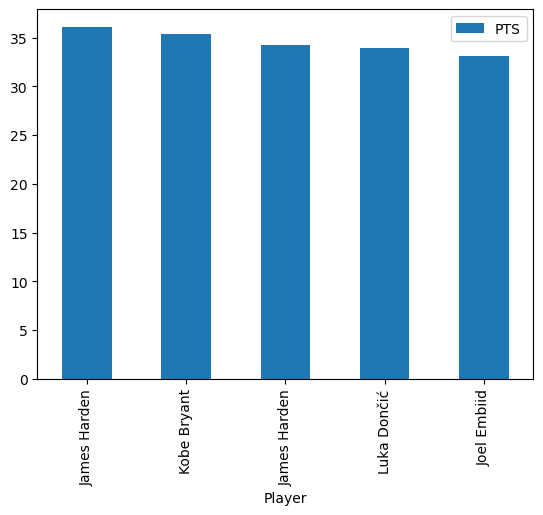

In [83]:
highest_scoring.head(5).plot.bar("Player", "PTS")

In [84]:
highest_scoring_per_year = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

<Axes: xlabel='Year'>

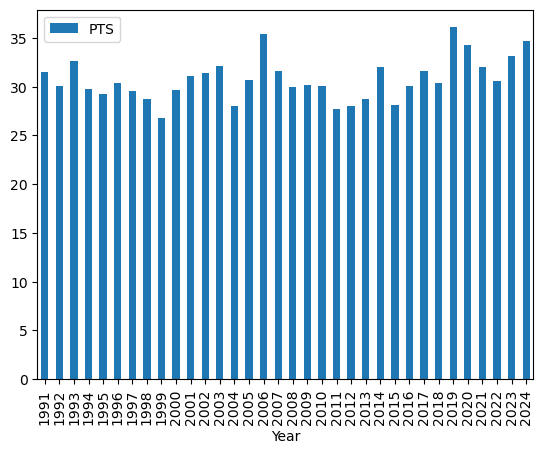

In [85]:
highest_scoring_per_year.plot.bar("Year", "PTS")

In [86]:
numeric_stats = stats.select_dtypes(include=[float, int])
numeric_stats.corr()["Share"]

Age        0.018729
G          0.088471
GS         0.165902
MP         0.158719
FG         0.272867
FGA        0.244456
FG%        0.065246
3P         0.087181
3PA        0.087819
3P%        0.013063
2P         0.277047
2PA        0.251912
2P%        0.058136
eFG%       0.056043
FT         0.317437
FTA        0.322885
FT%        0.036330
ORB        0.103067
DRB        0.219224
TRB        0.191863
AST        0.201258
STL        0.171425
BLK        0.152691
TOV        0.232502
PF         0.075190
PTS        0.283976
Year      -0.009744
Pts Won    0.994685
Pts Max    0.526325
Share      1.000000
W          0.119323
L         -0.118927
W/L%       0.123011
GB        -0.097886
PS/G       0.035798
PA/G      -0.037091
SRS        0.117464
Name: Share, dtype: float64